In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikrishnan/boston-house-prices")

print("Path to dataset files:", path)

d:\surya\python-practice\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\tssat\.cache\kagglehub\datasets\vikrishnan\boston-house-prices\versions\1


## House price prediction using Boston dataset

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv("datasets/Boston-Data.csv")
df = pd.DataFrame(data)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [44]:
X , y = df.drop(columns="PRICE",axis=1),df["PRICE"]



#### using feature selection to find the best feature of the target --> method : pearson correlation

<Axes: >

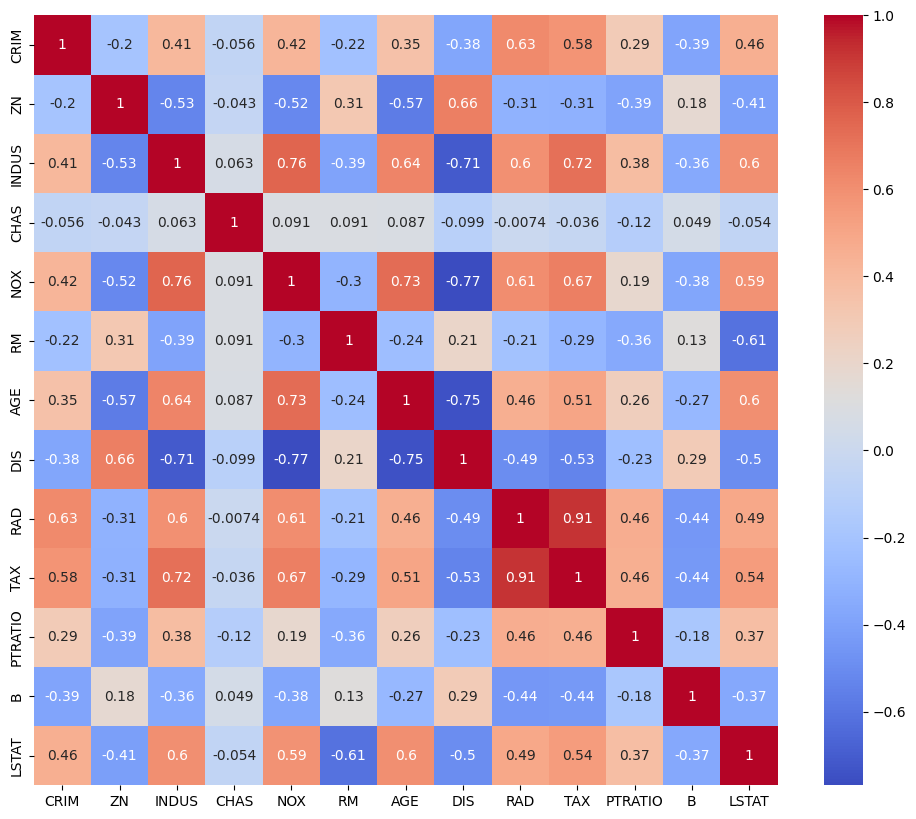

In [45]:
cor = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True,cmap="coolwarm")

In [46]:
def correlation(dataset,threshold):
    corr_data = dataset.corr()
    corr_features = set()
    for i in range(len(corr_data.columns)):
        for j in range(i):
            if abs(corr_data.iloc[i,j]) > threshold:
                colname = corr_data.columns[i]
                corr_features.add(colname)
    return corr_features

new_dataset = correlation(X,0.7)


In [47]:
X_new_data = X.drop(columns=[col for col in X.columns if col not in new_dataset],axis=1)
X_new_data

,NOX,AGE,DIS,TAX
0,0.538,65.2,4.0900,296.0
1,0.469,78.9,4.9671,242.0
2,0.469,61.1,4.9671,242.0
3,0.458,45.8,6.0622,222.0
4,0.458,54.2,6.0622,222.0
...,...,...,...,...
501,0.573,69.1,2.4786,273.0
502,0.573,76.7,2.2875,273.0
503,0.573,91.0,2.1675,273.0
504,0.573,89.3,2.3889,273.0


{'AGE', 'DIS'}

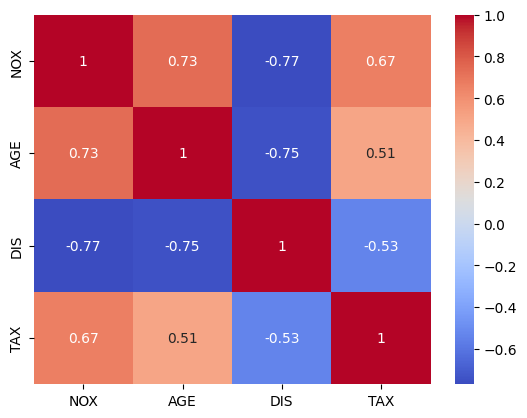

In [48]:
corr_data=X_new_data.corr()
sns.heatmap(corr_data, annot=True,cmap="coolwarm")
newest_dataset = correlation(X_new_data,0.73)
newest_dataset

In [49]:

X_final_data = X.drop(columns=[col for col in X.columns if col not in newest_dataset],axis=1)
X_final_data

,AGE,DIS
0,65.2,4.0900
1,78.9,4.9671
2,61.1,4.9671
3,45.8,6.0622
4,54.2,6.0622
...,...,...
501,69.1,2.4786
502,76.7,2.2875
503,91.0,2.1675
504,89.3,2.3889


In [65]:
X_train , X_test , Y_train , Y_test = train_test_split(
        X_final_data,
        y,
        test_size=0.2,
        random_state=42
)
X_train.shape , X_test.shape

((404, 2), (102, 2))

In [66]:
mod = LinearRegression().fit(X_train,Y_train)

In [67]:
pred = mod.predict(X_test)

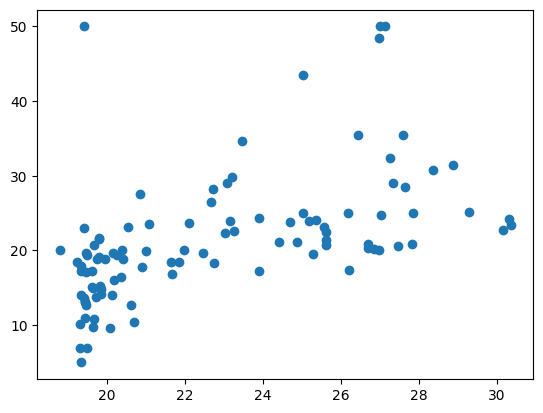

In [68]:
plt.scatter(pred ,Y_test)

In [69]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 55.215134397785405


In [ ]:

from sklearn.metrics import mean_squared_error
pipe = Pipeline([
    ("scale",StandardScaler()),
    ("model",LinearRegression())
])
pipe.fit(X_train,Y_train)
pipe_pred = pipe.predict(X_test)
mean_squared_error(Y_test,pipe_pred)

124.5922549019608

In [110]:
from sklearn.ensemble import StackingRegressor , RandomForestRegressor
stacked_model = StackingRegressor( 
    estimators=[
        ("rfg",RandomForestRegressor(n_estimators=10,random_state=14,)),
        ("lr",LinearRegression())
    ],
     final_estimator=RandomForestRegressor(n_estimators=10, random_state=14)
)
stacked_model.fit(X_train,Y_train)

StackingRegressor(estimators=[('rfg',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=14)),
                              ('lr', LinearRegression())],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=14))

In [111]:
stack_pred = stacked_model.predict(X_test)
mean_squared_error(stack_pred,Y_test)

74.60897647058823